# Scenario 2 Data Creation
This notebook creates datasets to be used in Scenario 2.

In [32]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [85]:
import pandas as pd
import random
from datetime import datetime, timedelta
import numpy as np

In [552]:
def gen_day(day):
    startdate = datetime(year=2018,month=1,day=1)
    Date = startdate+timedelta(day)
    Date = Date.strftime('%m-%d-%Y')
    
    tweets = random.randint(1,10)
    tweet_likes = round(tweets**(1.3+random.randint(0,300)/1000),0)
    retweets = round((tweets*(random.random() + random.randint(0,3))) + random.randint(0,500),0)
    
    facebook = random.randint(1,6)
    facebook_likes = round(facebook**(2+(random.randint(1,300)/1000)),0)
    facebook_shares = round(facebook*(2+(random.randint(1,3)/5)),0)
    
    instagram = random.randint(2,9)
    instagram_likes = round(instagram + random.randint(85,100)*(np.log10(instagram)),0)
    instagram_likes = random.randint(42,48)*np.log10(instagram) # + 50*instagram 
    
    day = {'Date': Date,
           'Tweets': tweets,
           'Tweet Likes': int(tweet_likes),
           'Retweets': int(retweets),
           'Facebook Posts': facebook,
           'Facebook Likes': int(facebook_likes),
           'Facebook Shares': int(facebook_shares),
           'Instagram Posts': instagram,
           'Instagram Likes': int(instagram_likes)}

    return day

In [553]:
days = []
for i in range(0,365):
    days.append(gen_day(i))

In [554]:
df = pd.DataFrame.from_records(days)

In [555]:
for i in range(2,10):
    m = df[df['Instagram Posts'] == i]['Instagram Likes'].describe().mean()
    ratio = m/i
    print(i)
    print(ratio)
    print(m)

2
7.994994390238836
15.989988780477672
3
7.036810508691616
21.110431526074848
4
6.7092497400107645
26.836998960043058
5
5.659511912276914
28.297559561384567
6
5.325058088609544
31.950348531657262
7
4.8967897398311
34.277528178817704
8
4.508626333131905
36.06901066505524
9
4.066141403701583
36.59527263331425


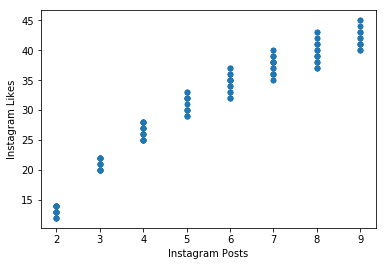

In [556]:
df.plot.scatter('Instagram Posts','Instagram Likes')

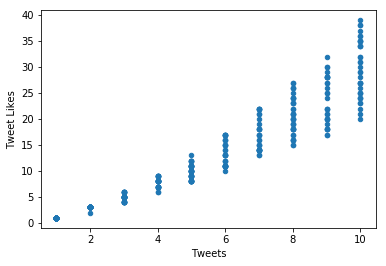

In [557]:
df.plot.scatter('Tweets','Tweet Likes')

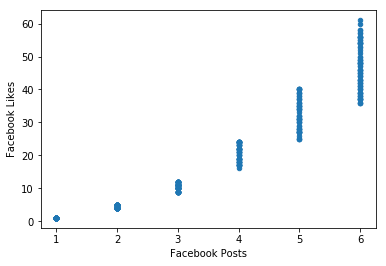

In [558]:
df.plot.scatter('Facebook Posts','Facebook Likes')

In [542]:
df.to_csv('../Class Files/Scenario 2/Online_Engagement_2018.csv', index=False)

In [543]:
df['Instagram Likes'].describe()

count    365.000000
mean      30.767123
std        9.656633
min       12.000000
25%       25.000000
50%       33.000000
75%       38.000000
max       45.000000
Name: Instagram Likes, dtype: float64

In [530]:
df['Facebook Likes'].describe()

count    365.000000
mean      18.306849
std       15.958190
min        1.000000
25%        4.000000
50%       11.000000
75%       31.000000
max       59.000000
Name: Facebook Likes, dtype: float64

In [531]:
df['Tweet Likes'].describe()

count    365.000000
mean      14.038356
std        9.245947
min        1.000000
25%        6.000000
50%       13.000000
75%       21.000000
max       40.000000
Name: Tweet Likes, dtype: float64

In [560]:
df['Total'] = df['Facebook Posts'] + df['Instagram Posts'] + df['Tweets']

In [561]:
df.Total.describe()

count    365.000000
mean      14.358904
std        4.059307
min        4.000000
25%       12.000000
50%       14.000000
75%       17.000000
max       24.000000
Name: Total, dtype: float64

In [563]:
5*3

15